In [1]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing training dataset
dftrain = pd.read_csv('train.csv')
dftrain.head(3)

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
print(dftrain.ftypes)
print(dftrain.shape)

ID                                 int64:dense
var3                               int64:dense
var15                              int64:dense
imp_ent_var16_ult1               float64:dense
imp_op_var39_comer_ult1          float64:dense
imp_op_var39_comer_ult3          float64:dense
imp_op_var40_comer_ult1          float64:dense
imp_op_var40_comer_ult3          float64:dense
imp_op_var40_efect_ult1          float64:dense
imp_op_var40_efect_ult3          float64:dense
imp_op_var40_ult1                float64:dense
imp_op_var41_comer_ult1          float64:dense
imp_op_var41_comer_ult3          float64:dense
imp_op_var41_efect_ult1          float64:dense
imp_op_var41_efect_ult3          float64:dense
imp_op_var41_ult1                float64:dense
imp_op_var39_efect_ult1          float64:dense
imp_op_var39_efect_ult3          float64:dense
imp_op_var39_ult1                float64:dense
imp_sal_var16_ult1               float64:dense
ind_var1_0                         int64:dense
ind_var1     

The first thing to do is to reduce de dataset dimensionality. For this purpose, let's use  thecnique

In [4]:
dftrain[['ID', 'TARGET']].groupby('TARGET').count()

,ID
TARGET,
0,73012
1,3008


In [5]:
from imblearn.over_sampling import SMOTE


In [6]:
X_nt = dftrain.iloc[:, :370].values
Y_nt = dftrain.iloc[:, 370]

sm = SMOTE(random_state=42)
X_res, Y_res = sm.fit_resample(X_nt, Y_nt)

colunas = dftrain.iloc[:, :370].columns
dftrain1 = pd.DataFrame(X_res, columns=colunas)
dftrain1['TARGET'] = Y_res
dftrain1[['ID', 'TARGET']].groupby('TARGET').count()

,ID
TARGET,
0,73012
1,73012


In [ ]:
# Importing sklearn modules
from sklearn import model_selection
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
dftrain2 = dftrain1.iloc[:, 1:370]
X_train = dftrain2.values
Y_train = dftrain1['TARGET']

In [ ]:
model = LogisticRegression()
rfe = RFE(model, 5)
rfe_fit = rfe.fit(X_train, Y_train)

print('number of features: %d' % (rfe_fit.n_features_))
print("selected features: %s" % rfe_fit.support_)
print("feature ranking: %s" % rfe_fit.ranking_)

rfe_set = rfe_fit.transform(X_train)
rfe_set.shape

In [ ]:
dfsel = pd.DataFrame(data={'Columns': dftrain1.columns, 'Selection': rfe_fit.support_})
colunas = dfsel[dfsel['Selection'] == True]['Columns']
colunas

In [9]:
dftrain1.corr()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.005946,0.002705,0.002361,-0.006200,-0.005869,-0.004576,-0.004424,-0.008012,-0.012714,...,0.001319,0.002628,-0.001179,-0.000965,-0.002789,-0.002701,-0.000666,0.000172,0.004223,0.008724
var3,-0.005946,1.000000,0.003523,0.001620,0.004950,0.005724,0.001348,0.001415,0.001016,0.001045,...,0.000437,0.000299,0.000388,0.000407,0.000368,0.000307,0.000475,0.000512,-0.001799,0.019353
var15,0.002705,0.003523,1.000000,0.035756,0.060570,0.066004,0.035605,0.037318,0.021841,0.019155,...,0.019694,0.011261,0.019362,0.019754,0.019879,0.012415,0.025058,0.026600,-0.012943,0.277088
imp_ent_var16_ult1,0.002361,0.001620,0.035756,1.000000,0.051135,0.047090,0.010459,0.013135,0.003409,0.010053,...,-0.000646,-0.000476,-0.000386,-0.000375,0.002349,-0.000456,0.006234,0.008273,0.018041,-0.007334
imp_op_var39_comer_ult1,-0.006200,0.004950,0.060570,0.051135,1.000000,0.906034,0.345056,0.297995,0.116799,0.134268,...,0.012565,0.008962,0.009647,0.010507,0.007298,0.004317,0.009702,0.009334,0.009964,-0.015179
imp_op_var39_comer_ult3,-0.005869,0.005724,0.066004,0.047090,0.906034,1.000000,0.318416,0.346869,0.096320,0.119807,...,0.023049,0.018255,0.015538,0.017288,0.007387,0.005522,0.009571,0.009036,0.012491,-0.029915
imp_op_var40_comer_ult1,-0.004576,0.001348,0.035605,0.010459,0.345056,0.318416,1.000000,0.863495,0.233603,0.248233,...,0.002728,0.005727,0.001529,0.002306,-0.000330,-0.000375,-0.000217,-0.000333,0.013167,-0.002545
imp_op_var40_comer_ult3,-0.004424,0.001415,0.037318,0.013135,0.297995,0.346869,0.863495,1.000000,0.171342,0.201071,...,0.005552,0.010066,0.003145,0.004620,-0.000393,-0.000388,-0.000371,-0.000466,0.013620,-0.010990
imp_op_var40_efect_ult1,-0.008012,0.001016,0.021841,0.003409,0.116799,0.096320,0.233603,0.171342,1.000000,0.897575,...,-0.000396,-0.000273,-0.000355,-0.000372,-0.000356,-0.000286,-0.000464,-0.000501,-0.001818,0.023040
imp_op_var40_efect_ult3,-0.012714,0.001045,0.019155,0.010053,0.134268,0.119807,0.248233,0.201071,0.897575,1.000000,...,-0.000408,-0.000281,-0.000365,-0.000382,-0.000367,-0.000295,-0.000477,-0.000515,-0.000652,0.022773


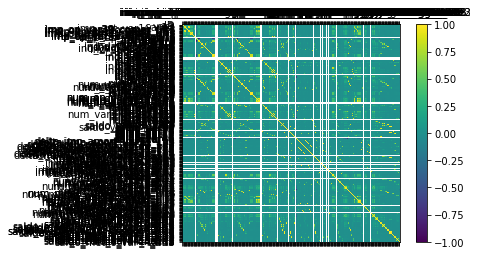

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
ID,1.000000,-0.001025,-0.002135,-0.003111,-0.001436,-0.004131,-0.007277,-0.006302,-0.006700,-0.006698,...,0.001986,0.003771,-0.001521,-0.001216,-0.003772,-0.003674,-0.000856,0.000297,-0.005687,0.003148
var3,-0.001025,1.000000,0.003523,0.001620,0.004950,0.005724,0.001348,0.001415,0.001016,0.001045,...,0.000437,0.000299,0.000388,0.000407,0.000368,0.000307,0.000475,0.000512,-0.001799,0.004475
var15,-0.002135,0.003523,1.000000,0.035756,0.060570,0.066004,0.035605,0.037318,0.021841,0.019155,...,0.019694,0.011261,0.019362,0.019754,0.019879,0.012415,0.025058,0.026600,-0.012943,0.101322
imp_ent_var16_ult1,-0.003111,0.001620,0.035756,1.000000,0.051135,0.047090,0.010459,0.013135,0.003409,0.010053,...,-0.000646,-0.000476,-0.000386,-0.000375,0.002349,-0.000456,0.006234,0.008273,0.018041,-0.000017
imp_op_var39_comer_ult1,-0.001436,0.004950,0.060570,0.051135,1.000000,0.906034,0.345056,0.297995,0.116799,0.134268,...,0.012565,0.008962,0.009647,0.010507,0.007298,0.004317,0.009702,0.009334,0.009964,0.010353
imp_op_var39_comer_ult3,-0.004131,0.005724,0.066004,0.047090,0.906034,1.000000,0.318416,0.346869,0.096320,0.119807,...,0.023049,0.018255,0.015538,0.017288,0.007387,0.005522,0.009571,0.009036,0.012491,0.003517
imp_op_var40_comer_ult1,-0.007277,0.001348,0.035605,0.010459,0.345056,0.318416,1.000000,0.863495,0.233603,0.248233,...,0.002728,0.005727,0.001529,0.002306,-0.000330,-0.000375,-0.000217,-0.000333,0.013167,0.003119
imp_op_var40_comer_ult3,-0.006302,0.001415,0.037318,0.013135,0.297995,0.346869,0.863495,1.000000,0.171342,0.201071,...,0.005552,0.010066,0.003145,0.004620,-0.000393,-0.000388,-0.000371,-0.000466,0.013620,-0.000358
imp_op_var40_efect_ult1,-0.006700,0.001016,0.021841,0.003409,0.116799,0.096320,0.233603,0.171342,1.000000,0.897575,...,-0.000396,-0.000273,-0.000355,-0.000372,-0.000356,-0.000286,-0.000464,-0.000501,-0.001818,0.019221
imp_op_var40_efect_ult3,-0.006698,0.001045,0.019155,0.010053,0.134268,0.119807,0.248233,0.201071,0.897575,1.000000,...,-0.000408,-0.000281,-0.000365,-0.000382,-0.000367,-0.000295,-0.000477,-0.000515,-0.000652,0.019965


In [8]:
dftrain2 = dftrain1[colunas]
dftrain2[['TARGET', 'ID']] = dftrain[['TARGET', 'ID']]

# Correlation Matrix
correlations = dftrain2.corr()

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 371, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(colunas)
ax.set_yticklabels(colunas)
plt.show()

correlations

In [ ]:
dftrain2.iloc[:, :6].hist()
plt.show()

In [ ]:
# Creating a list of classification models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('SVC', SVC()))
models.append(('XGB', GradientBoostingClassifier()))
models.append(('RDF', RandomForestClassifier()))
models.append(('KME', KMeans()))

# Applying models on training dataset and evaluating their accuracy
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cross_val_result = model_selection.cross_val_score(model, rfe_set, Y_train, cv=kfold, scoring='accuracy')
    
    results.append(cross_val_result)
    names.append(name)
    
    text = '%s: %.3f (%.3f)' % (name, cross_val_result.mean(), cross_val_result.std())
    print(text)

fig = plt.figure()
fig.suptitle('Comparing algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
knn = KNeighborsClassifier()
knn_fit = knn.fit(rfe_set, Y_train)
knn_out = knn_fit.predict(rfe_set)
knn_out

In [ ]:
df = pd.DataFrame(data=knn_out, columns=['values'])
df['key'] = range(0,76020)
df.head()

In [ ]:
df.groupby('values').count()

In [ ]:
confusion_matrix(Y, knn_out)